In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# brest_cancer_df= pd.read_csv('/kaggle/input/brest-cancer/breast-cancer.csv')
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
cancer.data.shape

(569, 30)

In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.target_names)

['malignant' 'benign']


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, x_test, Y_train, y_test=train_test_split(cancer.data,cancer.target,random_state=42)

In [8]:
print("Shape of Train Data : ", X_train.shape)
print("Shape of Train Data : ", x_test.shape)

Shape of Train Data :  (426, 30)
Shape of Train Data :  (143, 30)


In [9]:
Y_train.shape

(426,)

<Axes: ylabel='count'>

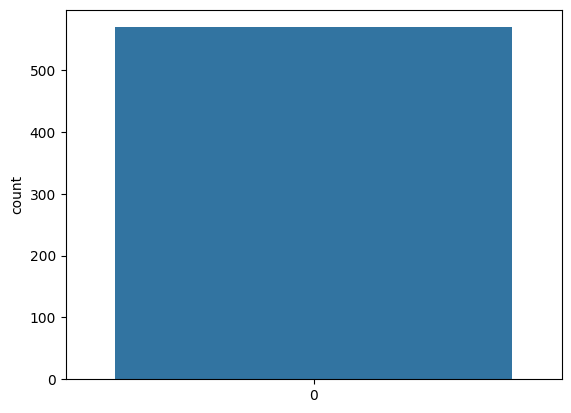

In [10]:
sns.countplot(cancer.target)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier()

In [13]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
y_pred=knn.predict(x_test)

In [15]:
knn.score(X_train, Y_train)

0.9342723004694836

In [16]:
knn.score(x_test,y_test)

0.965034965034965

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

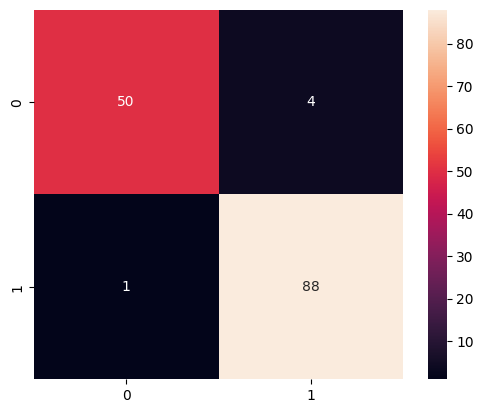

In [19]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,square=True, annot=True)

In [20]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

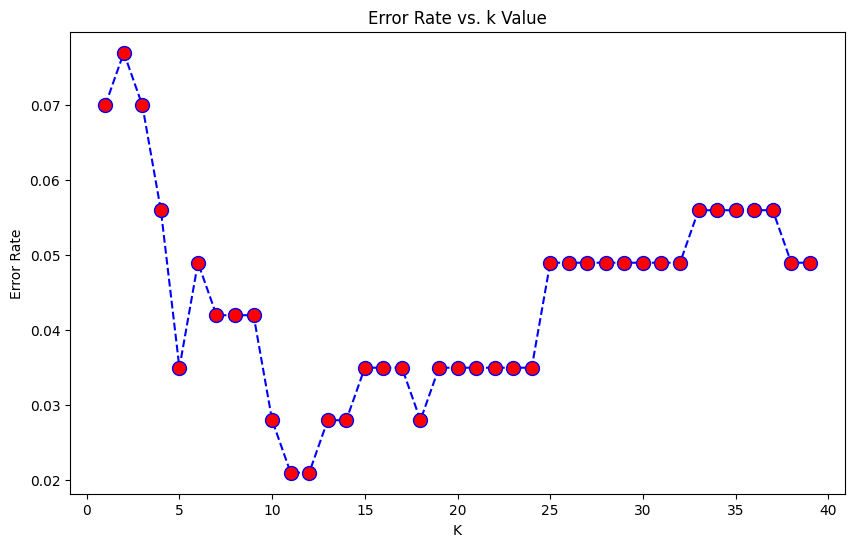

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o'
        ,markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn=KNeighborsClassifier(n_neighbors=11)

In [23]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [24]:
y_pred=knn.predict(x_test)

In [25]:
knn.score(X_train, Y_train)

0.9342723004694836

In [26]:
knn.score(x_test,y_test)

0.9790209790209791